In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config; set_config(display='diagram')

In [2]:
# Use this cell to regroup all your imports

# 🔥 LeWagon Kaggle Batch Challenge

<img src='https://github.com/lewagon/data-images/blob/master/ML/kaggle-batch-challenge.png?raw=true' width=600>

Welcome to your first Kaggle competition!

Your objective is to **submit online an answer** to the open competition [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

- Fortunately, you have already come across the house dataset in the bootcamp!
- You will be semi-guided up to a **baseline model**
- Only after will you be free to improve & refine your models
- We will approach the problem through **pipelines** (the best practice to take!)

A word on Kaggle:
- Kaggle will rank your submission amongst all participants!
- But don't worry, everyone is publicly removed from the leaderboard after 2 months
- You can make to 10 submissions per day

## Setup Kaggle

👉 Create an account on Kaggle if you want to participate in the competition. 

👉 Join the [House Prices Challenge](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) 

👉 Write down your Kaggle `username` the [result spreadsheet here](https://docs.google.com/spreadsheets/d/1ZEBKwa_k1Ytb0WCOh-Nopq3eaezwBNu1SAqKXEXRguc/edit#gid=0) (pick the correct batch!)

**Your whole class will compete as a group against the team of TAs**

## Load

We have already downloaded for you everything from Kaggle into your current notebook folder:
- `train.csv` is your (1460 * 81) training set containing `X` and `y`
- `test.csv` is your (1459 * 80) testing set without the associated target `y`!
- `sample_submission.csv` describing the format required to submit your answer
- `data_description.txt` describing all columns

Your goal is to predict the `y_pred` missing from your test set and submit it to discover your test_score & ranking

❓ Load the train dataset in a DataFrame `data` and create your `X` and `y`. Inspect their shape

In [3]:
# You can use this direct download link if you don't want to create a Kaggle account
data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/houses_train_raw.csv")
data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [4]:
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

In [5]:
X.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [15]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

# 🐣 BASELINE

## Initial feature overview

80 features is too much to deal with one-by-one for a first baseline pipeline! Let's treat them solely based on their `dtype`:

❓ How many numerical features vs. categorical features do we have? 

In [82]:
numeric_cols = (data.dtypes == float)|(data.dtypes == int)
categoric_cols = (data.dtypes == object)
 

num_cols = [c for c in numeric_cols.index if numeric_cols[c] == True ]
cat_cols = [c for c in categoric_cols.index if categoric_cols[c] == True ]

print(' Numb len:',len(num_cols),'\n','Cat len:',len(cat_cols))


 Numb len: 38 
 Cat len: 43


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

❓ Store the Series `feat_categorical_nunique` containing the number of **unique values** for each categorical feature in our training set. How many unique categories are there in total ?

In [98]:
X.dtypes.value_counts()

object     43
int64      34
float64     3
dtype: int64

In [177]:
feat_numeric_nunique=list(data_category_uniq[data_category_uniq[0]==False]['index'])

In [162]:
data_category_uniq=pd.DataFrame(X.dtypes==object).reset_index()
list(data_category_uniq[data_category_uniq[0]==True]['index'])

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [164]:
feat_categorical_nunique=list(data_category_uniq[data_category_uniq[0]==True]['index'])
feat_categorical_nunique

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [166]:
X_new=X[feat_categorical_nunique]

In [167]:
data_category=pd.DataFrame(X_new.nunique())
feat_categorical_nunique=data_category.sum()
feat_categorical_nunique

0    252
dtype: int64

In [169]:
data_category.sort_values(by=0,inplace=True)
data_category.head(33)

0
Street         2
Alley          2
CentralAir     2
Utilities      2
LandSlope      3
PoolQC         3
PavedDrive     3
GarageFinish   3
LotShape       4
LandContour    4
MiscFeature    4
Fence          4
BsmtExposure   4
MasVnrType     4
KitchenQual    4
ExterQual      4
BsmtQual       4
BsmtCond       4
LotConfig      5
ExterCond      5
BldgType       5
MSZoning       5
GarageQual     5
HeatingQC      5
Electrical     5
FireplaceQu    5
GarageCond     5
BsmtFinType2   6
SaleCondition  6
Foundation     6
Heating        6
RoofStyle      6
BsmtFinType1   6

In [170]:
data_category_final=data_category[data_category<7].dropna()
list(data_category_final.index)

['Street',
 'Alley',
 'CentralAir',
 'Utilities',
 'LandSlope',
 'PoolQC',
 'PavedDrive',
 'GarageFinish',
 'LotShape',
 'LandContour',
 'MiscFeature',
 'Fence',
 'BsmtExposure',
 'MasVnrType',
 'KitchenQual',
 'ExterQual',
 'BsmtQual',
 'BsmtCond',
 'LotConfig',
 'ExterCond',
 'BldgType',
 'MSZoning',
 'GarageQual',
 'HeatingQC',
 'Electrical',
 'FireplaceQu',
 'GarageCond',
 'BsmtFinType2',
 'SaleCondition',
 'Foundation',
 'Heating',
 'RoofStyle',
 'BsmtFinType1',
 'GarageType']

In [182]:
data_category_final2=data_category[data_category>=7].dropna()
columns_drop=list(data_category_final2.index)

In [89]:
data['HalfBath'].unique()

array([1, 0, 2])

🤔 If we were to `OneHotEncode` all categorical features, our feature matrix `X_preproc` would become pretty big and spare, with almost 300 (highly correlated) features for only 1400 observations. Ideally, we should aim at feeding our model with 50-100 features max (📚 Read this [rule of thumb](https://datascience.stackexchange.com/a/11480/98300))

There are 2 main strategies to reduce the number of categorical features post-preprocessing:
- **[Remove](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection)** features that bring too little explanation to our model. This may require statistical analysis of feature importance 
- **[Ordinally encode](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html)** (instead of one-hot-encode) categorical features into integers. However this forces a notion of "order" (1>2>3...) that can be detrimental if not set properly!

❓ Plot the **histogram** of number of unique value per categorical feature. Do you see some quick wins?

In [171]:
import plotly.express as px
# Here we use a column with categorical data
fig = px.histogram(data_category)
fig.show()

💡 As a starter, what about simply removing all features that have **7 unique values or more**, and one-hot-encode every others? Let's keep ordinal encoding and statistical feature selection for the next iteration.

❓ Store features to OHE in a list `feat_categorical_small` below. How many features will be OHE?

In [172]:
# categorical features to one-hot-encode
feat_categorical_small =list(data_category_final.index)

🧪 Test your code below (and clear the cell once it passed)

In [173]:
from nbresult import ChallengeResult
result = ChallengeResult('features_overview',
    n=len(feat_categorical_small))
result.write(); print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.6, pytest-6.2.4, py-1.10.0, pluggy-0.13.1 -- /home/jpr/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/jpr/code/jhon2301922021/data-challenges/05-ML/07-Ensemble-Methods/01-Houses-Kaggle-Competition
plugins: anyio-3.3.0, dash-1.21.0
collecting ... collected 1 item

tests/test_features_overview.py::TestFeaturesOverview::test_feat_categorical_small PASSED [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/features_overview.pickle

git commit -m 'Completed features_overview step'

git push origin master


## Preprocessing pipeline - V1 minimal baseline

---
❓ Let's code the basic preprocessing pipeline described below. Save it under `preproc_baseline`.

For categorical features
- Simple-Impute with most frequent values
- One-Hot-Encode features that have less than 7 unique values to start with
- Drop all others features


As for numerical features
- Simple-Impute with strategy 'mean'
- Min-Max Scale 


<details>
    <summary>ℹ️ Pro tips</summary>

If you are confident, you can try sklearn's shorter syntax `make_pipeline` or `make_column_transformer` instead of the longer syntax `Pipeline` or `ColumnTransformer` if you want to avoid giving names manually to every steps.
</details>

In [234]:
X.drop(columns='Id',inplace=True)

In [235]:
X

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60       RL         62.0     7917   Pave   NaN      Reg   
1456          20       RL         85.0    13175   Pave   NaN      Reg   
1457          70       RL         66.0     9042   Pave   NaN      Reg   
1458          20       RL         68.0     9717   Pave   NaN      Reg   
1459          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... 3SsnPorch ScreenPorch  PoolArea  \
0            Lvl    AllPub    Inside  ...         0           0         0   
1            Lvl    AllPub       FR2  ...         0           0         0   
2            Lvl    AllPub    Inside  ...         0           0         0   
3            Lvl    AllPub    Corner  ...         0           0         0   
4            Lvl    AllPub       FR2  ...         0           0         0   
...          ...       ...       ...  ...       ...         ...       ...   
1455         Lvl    AllPub    Inside  ...         0           0         0   
1456         Lvl    AllPub    Inside  ...         0           0         0   
1457         Lvl    AllPub    Inside  ...         0           0         0   
1458         Lvl    AllPub    Inside  ...         0           0         0   
1459         Lvl    AllPub    Inside  ...         0           0         0   

      PoolQC  Fence  MiscFeature MiscVal MoSold  YrSold SaleCondition  
0        NaN    NaN          NaN       0      2    2008        Normal  
1        NaN    NaN          NaN       0      5    2007        Normal  
2        NaN    NaN          NaN       0      9    2008        Normal  
3        NaN    NaN          NaN       0      2    2006       Abnorml  
4        NaN    NaN          NaN       0     12    2008        Normal  
...      ...    ...          ...     ...    ...     ...           ...  
1455     NaN    NaN          NaN       0      8    2007        Normal  
1456     NaN  MnPrv          NaN       0      2    2010        Normal  
1457     NaN  GdPrv         Shed    2500      5    2010        Normal  
1458     NaN    NaN          NaN       0      4    2010        Normal  
1459     NaN    NaN          NaN       0      6    2008        Normal  

[1460 rows x 70 columns]

In [244]:
print(feat_categorical_small)
print(len(feat_categorical_small))
print(feat_numeric_nunique)
len(feat_numeric_nunique)
feat_numeric_nunique=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

['Street', 'Alley', 'CentralAir', 'Utilities', 'LandSlope', 'PoolQC', 'PavedDrive', 'GarageFinish', 'LotShape', 'LandContour', 'MiscFeature', 'Fence', 'BsmtExposure', 'MasVnrType', 'KitchenQual', 'ExterQual', 'BsmtQual', 'BsmtCond', 'LotConfig', 'ExterCond', 'BldgType', 'MSZoning', 'GarageQual', 'HeatingQC', 'Electrical', 'FireplaceQu', 'GarageCond', 'BsmtFinType2', 'SaleCondition', 'Foundation', 'Heating', 'RoofStyle', 'BsmtFinType1', 'GarageType']
34
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [245]:
from sklearn import set_config; set_config(display='diagram')

In [246]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge

In [247]:
# Dummy code your pipeline first


# Add it at the end of our numerical transformer
num_transformer = Pipeline([
                            ('imputer', SimpleImputer(strategy='mean')),
                            ('scaler', MinMaxScaler())
                           ])

# Encode categorical variables
cat_transformer = Pipeline([
                            ('imputer', SimpleImputer(strategy='most_frequent')),
                            ('One_hot',OneHotEncoder(handle_unknown='ignore'))
                          ])

preprocessor = ColumnTransformer([
                                    ('num_transformer', num_transformer, feat_numeric_nunique),
                                    ('cat_transformer', cat_transformer, feat_categorical_small),
                                ])


final_pipe=Pipeline([ 
                        ('preprocess', preprocessor), # columns 0-8
                        ('rigde',Ridge())
                    ])
final_pipe
# Code it for real below


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'G...
                                                   'LandSlope', 'PoolQC',
                                                   'PavedDrive', 'GarageFinish',
                                                   'LotShape', 'LandContour',
                                                   'MiscFeature', 'Fence',
                                                   'BsmtExposure', 'MasVnrType',
                                                   'KitchenQual', 'ExterQual',
                                                   'BsmtQual', 'BsmtCond',
                                                   'LotConfig', 'ExterCond',
                                                   'BldgType', 'MSZoning',
                                                   'GarageQual', 'HeatingQC',
                                                   'Electrical', 'FireplaceQu',
                                                   'GarageCond', 'BsmtFinType2',
                                                   'SaleCondition',
                                                   'Foundation', ...])])),
                ('rigde', Ridge())])

In [248]:
preproc_baseline = pd.DataFrame(preprocessor.fit_transform(X))
preproc_baseline.shape


(1460, 183)

❓ Look at the **shape** of your preprocessed dataframe.

In [249]:
shape_preproc_baseline =preproc_baseline.shape

🧪 Test your code below

In [250]:
from nbresult import ChallengeResult
result = ChallengeResult('preproc_baseline',
    shape=shape_preproc_baseline)
result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.6, pytest-6.2.4, py-1.10.0, pluggy-0.13.1 -- /home/jpr/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/jpr/code/jhon2301922021/data-challenges/05-ML/07-Ensemble-Methods/01-Houses-Kaggle-Competition
plugins: anyio-3.3.0, dash-1.21.0
collecting ... collected 1 item

tests/test_preproc_baseline.py::TestPreprocBaseline::test_shape PASSED   [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/preproc_baseline.pickle

git commit -m 'Completed preproc_baseline step'

git push origin master


## Model baseline

❓ Pipe a basic Ridge regressor to your `preproc_baseline` and store it to `pipe_baseline` variable.

In [251]:
pipe_baseline = final_pipe

❓ Read the Kaggle [contest evaluation rules](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/evaluation) 
- Which performance metric do you need? Is it readily available in sklearn?
- Create a scorer using [`make_scorer`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) and store it into a variable named `rmsle`
- Create also the negative score `rmsle_neg` which is best when _maximized_. This will come handy later as `GridSearchCV` requires a score to _maximize_

In [253]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_log_error

rmsle_neg= make_scorer(lambda real, predicted: (mean_squared_log_error(real, predicted))**0.5)
cross_val_score(pipe_baseline,X,y,cv=5 ,scoring=rmsle_neg).mean()

0.16642907520861633

❓5-fold cross_validate your `pipe_baseline` using this metric to get a first glance at your baseline perf.    
Store your mean score as `score_baseline`

In [254]:
score_baseline = cross_val_score(pipe_baseline,X,y,cv=5 ,scoring=rmsle_neg).mean()

## Predict baseline

❓ Predict `y_pred_baseline` from the Kaggle `test.csv` dataset you stored in the `data` folder.

In [255]:
X_test = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/houses_test_raw.csv")


In [269]:
X_test=X_test[list(X.columns)]

In [273]:
list(X.columns)

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'BldgType',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'YrSo

In [275]:
y_pred_baseline=pipe_baseline.predict(X_test)
y_pred_baseline

array([113256.76959388, 136811.0145436 , 174901.68834287, ...,
       157216.07718185, 111472.49591662, 234985.99120322])

❓ Finally, store your CSV ready to be submitted as `submission_baseline.csv` in the `data` folder. Read carefully the Kaggle required format and test it below (you don't need to submit this baseline online for now).

In [262]:
pipe_baseline.fit(X,y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'G...
                                                   'LandSlope', 'PoolQC',
                                                   'PavedDrive', 'GarageFinish',
                                                   'LotShape', 'LandContour',
                                                   'MiscFeature', 'Fence',
                                                   'BsmtExposure', 'MasVnrType',
                                                   'KitchenQual', 'ExterQual',
                                                   'BsmtQual', 'BsmtCond',
                                                   'LotConfig', 'ExterCond',
                                                   'BldgType', 'MSZoning',
                                                   'GarageQual', 'HeatingQC',
                                                   'Electrical', 'FireplaceQu',
                                                   'GarageCond', 'BsmtFinType2',
                                                   'SaleCondition',
                                                   'Foundation', ...])])),
                ('rigde', Ridge())])

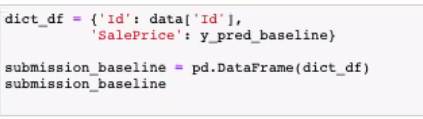

In [320]:
X_test

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             20       RH         80.0    11622   Pave   NaN      Reg   
1             20       RL         81.0    14267   Pave   NaN      IR1   
2             60       RL         74.0    13830   Pave   NaN      IR1   
3             60       RL         78.0     9978   Pave   NaN      IR1   
4            120       RL         43.0     5005   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1454         160       RM         21.0     1936   Pave   NaN      Reg   
1455         160       RM         21.0     1894   Pave   NaN      Reg   
1456          20       RL        160.0    20000   Pave   NaN      Reg   
1457          85       RL         62.0    10441   Pave   NaN      Reg   
1458          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... 3SsnPorch ScreenPorch  PoolArea  \
0            Lvl    AllPub    Inside  ...         0         120         0   
1            Lvl    AllPub    Corner  ...         0           0         0   
2            Lvl    AllPub    Inside  ...         0           0         0   
3            Lvl    AllPub    Inside  ...         0           0         0   
4            HLS    AllPub    Inside  ...         0         144         0   
...          ...       ...       ...  ...       ...         ...       ...   
1454         Lvl    AllPub    Inside  ...         0           0         0   
1455         Lvl    AllPub    Inside  ...         0           0         0   
1456         Lvl    AllPub    Inside  ...         0           0         0   
1457         Lvl    AllPub    Inside  ...         0           0         0   
1458         Lvl    AllPub    Inside  ...         0           0         0   

      PoolQC  Fence  MiscFeature MiscVal MoSold  YrSold SaleCondition  
0        NaN  MnPrv          NaN       0      6    2010        Normal  
1        NaN    NaN         Gar2   12500      6    2010        Normal  
2        NaN  MnPrv          NaN       0      3    2010        Normal  
3        NaN    NaN          NaN       0      6    2010        Normal  
4        NaN    NaN          NaN       0      1    2010        Normal  
...      ...    ...          ...     ...    ...     ...           ...  
1454     NaN    NaN          NaN       0      6    2006        Normal  
1455     NaN    NaN          NaN       0      4    2006       Abnorml  
1456     NaN    NaN          NaN       0      9    2006       Abnorml  
1457     NaN  MnPrv         Shed     700      7    2006        Normal  
1458     NaN    NaN          NaN       0     11    2006        Normal  

[1459 rows x 70 columns]

In [327]:
data_dict={
            'Id':X_test.index,
           'SalePrice':y_pred_baseline 
          }
submission_baseline=pd.DataFrame(data_dict )
submission_baseline.set_index('Id',inplace=True)
submission_baseline.to_csv('data/submission_baseline.csv')
submission_baseline

SalePrice
Id                 
0     113256.769594
1     136811.014544
2     174901.688343
3     190322.363348
4     187149.759609
...             ...
1454   66081.031488
1455   65988.765038
1456  157216.077182
1457  111472.495917
1458  234985.991203

[1459 rows x 1 columns]

In [328]:
submission_shape=submission_baseline.shape

In [329]:
submission_columns=submission_baseline.columns

In [330]:
submission_dtypes=submission_baseline.dtypes

🧪 Test your code

In [331]:
from nbresult import ChallengeResult
tmp = pd.read_csv("data/submission_baseline.csv")
result = ChallengeResult('submission_baseline',
    score_baseline = score_baseline,
    submission_shape = tmp.shape,
    submission_columns = list(tmp.columns),
    submission_dtypes = str(list(tmp.dtypes)),
)
result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.6, pytest-6.2.4, py-1.10.0, pluggy-0.13.1 -- /home/jpr/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/jpr/code/jhon2301922021/data-challenges/05-ML/07-Ensemble-Methods/01-Houses-Kaggle-Competition
plugins: anyio-3.3.0, dash-1.21.0
collecting ... collected 4 items

tests/test_submission_baseline.py::TestSubmissionBaseline::test_score_baseline PASSED [ 25%]
tests/test_submission_baseline.py::TestSubmissionBaseline::test_submission_columns PASSED [ 50%]
tests/test_submission_baseline.py::TestSubmissionBaseline::test_submission_dtypes PASSED [ 75%]
tests/test_submission_baseline.py::TestSubmissionBaseline::test_submission_shape PASSED [100%]

============================== 4 passed in 0.08s ===============================


💯 You can commit your code:

git add tests/submission_baseline.pickle

git commit -m 'Completed submission_baseline step'

git push 

# 🏋️‍♀️ ITERATIONS 

🎉 🎉 Congratulation for having fully pipelined a basline model! You will see now how easier it is to iterate and improve performance 🚀

- Your goal is to improve your prediction and submit it by **16h30 max online**
- We suggested you some improvements below
- **Pick up your fights** and **incrementally** improve your pipeline as you see fit

**Models**

- Linear Models: fine-tune regularization ?
- **Tree-based ensembles (must try today)**: Probably the best suited for many categorical-features problems
- Stacking !
- ...

**Preprocessing** (once your first ensemble models works)

- Ordinal Encoding of categorical features with a hidden notion of order in their values (e.g. "bad", "average", good")
- Statistical Feature Selection to remove useless features (avoid overfitting and reduce train time)
- Predict log(SalePrice) instead?
- ...

In [339]:
X

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60       RL         62.0     7917   Pave   NaN      Reg   
1456          20       RL         85.0    13175   Pave   NaN      Reg   
1457          70       RL         66.0     9042   Pave   NaN      Reg   
1458          20       RL         68.0     9717   Pave   NaN      Reg   
1459          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... 3SsnPorch ScreenPorch  PoolArea  \
0            Lvl    AllPub    Inside  ...         0           0         0   
1            Lvl    AllPub       FR2  ...         0           0         0   
2            Lvl    AllPub    Inside  ...         0           0         0   
3            Lvl    AllPub    Corner  ...         0           0         0   
4            Lvl    AllPub       FR2  ...         0           0         0   
...          ...       ...       ...  ...       ...         ...       ...   
1455         Lvl    AllPub    Inside  ...         0           0         0   
1456         Lvl    AllPub    Inside  ...         0           0         0   
1457         Lvl    AllPub    Inside  ...         0           0         0   
1458         Lvl    AllPub    Inside  ...         0           0         0   
1459         Lvl    AllPub    Inside  ...         0           0         0   

      PoolQC  Fence  MiscFeature MiscVal MoSold  YrSold SaleCondition  
0        NaN    NaN          NaN       0      2    2008        Normal  
1        NaN    NaN          NaN       0      5    2007        Normal  
2        NaN    NaN          NaN       0      9    2008        Normal  
3        NaN    NaN          NaN       0      2    2006       Abnorml  
4        NaN    NaN          NaN       0     12    2008        Normal  
...      ...    ...          ...     ...    ...     ...           ...  
1455     NaN    NaN          NaN       0      8    2007        Normal  
1456     NaN  MnPrv          NaN       0      2    2010        Normal  
1457     NaN  GdPrv         Shed    2500      5    2010        Normal  
1458     NaN    NaN          NaN       0      4    2010        Normal  
1459     NaN    NaN          NaN       0      6    2008        Normal  

[1460 rows x 70 columns]

In [342]:
from sklearn.ensemble import RandomForestClassifier
#@interact(max_depth=5)
def plot_classifier(max_depth):
    cls = RandomForestClassifier(max_depth=max_depth)
    cls.fit(X, y)
    plot_decision_regions(X, y, classifier=cls)

plot_classifier(max_depth=5)

ValueError: could not convert string to float: 'RL'

## Preprocessing Iteration (⚠️ come back here after your first Ensemble model)

⏩ Collapse me if you don't use me!

### Ordinal Encoding (1h)

❓ Look at the following feature below. Couldn't it be encoded numerically in a wise manner?
```
ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
```

💡 Luckily, the `OrdinalEncoder` and its argument `categories`  allows us to do just that. Check it out below and make sure to understand how ths works

In [333]:
# Define specific order for features
# Note: if you change this order, it will change the output for .transform()
from sklearn.preprocessing import OrdinalEncoder
feature_A_sorted_values = ['bad', 'average', 'good'] 
feature_B_sorted_values = ['dirty', 'clean', 'new']

encoder = OrdinalEncoder(
    categories=[
        feature_A_sorted_values,
        feature_B_sorted_values
    ],
    handle_unknown="use_encoded_value",
    unknown_value=-1
)

# Just some random training data
XX = [
    ['good', 'dirty'],
    ['bad', 'new'],
    ['average', 'clean'],
]

encoder.fit(XX)

encoder.transform([
        ['bad', "dirty"],
        ['good', 'new'],
        ['bad', 'oooops never seen this label before']
])

array([[ 0.,  0.],
       [ 2.,  2.],
       [ 0., -1.]])

---
❓ **Your turn**: split your categorical preprocessor into

- `preproc_ordinal` to ordinally encode **some features** of your choice (**do a quick iteration first**)
- `preproc_nominal` to one hot encode the other ones


<details>
    <summary>Hints</summary>

- You won't be able to avoid hard-coding names and ordered values of features! Be tidy!
- It's a good practice to sort alphabetically your features to avoid bad surprises
</details>

In [338]:
X[feat_categorical_small].nunique()

Street           2
Alley            2
CentralAir       2
Utilities        2
LandSlope        3
PoolQC           3
PavedDrive       3
GarageFinish     3
LotShape         4
LandContour      4
MiscFeature      4
Fence            4
BsmtExposure     4
MasVnrType       4
KitchenQual      4
ExterQual        4
BsmtQual         4
BsmtCond         4
LotConfig        5
ExterCond        5
BldgType         5
MSZoning         5
GarageQual       5
HeatingQC        5
Electrical       5
FireplaceQu      5
GarageCond       5
BsmtFinType2     6
SaleCondition    6
Foundation       6
Heating          6
RoofStyle        6
BsmtFinType1     6
GarageType       6
dtype: int64

### Target engineering (15 min)

❓ We are asked to minimize the RMS**L**E. Why don't we transform our target to directly predict its log?
- Check-out historgram of your target `y`. Normally distributed variables should be easier to predict with linear models. 
- Create `y_log` and your new performance metrics
- Don't forget at the end to take the exponential of your predictions!

### Statistical Feature Selection (1h)

Our goal is to remove the least interesting features, to limit overfitting and shorten training time.  
Choose one of the 3 options below

#### (option 1 - recommended) univariate feature selection based on relationship with target `y`

❓ We will use sklearn's [feature selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) tools directly in your pipeline.
- Add a `SelectPercentile` filter (coupled with `mutual_info_regression` for the statistical test to use) at the end of your `preproc` pipeline.
- This will filter-out features that, - taken individually - least explain your target!  

#### (option 2) multivariate feature selection based their common relationship with target `y`

❓ We will use sklearn's [feature selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) tools directly in your pipeline.
- Add a `SequentialFeatureSelector` at the end of your `preproc` pipeline.
- This will recursively filter-out least important features according to `feature_permutation` importance!  
- Probably overkill for such small dataset!

#### (option 3) Filter based only on the properties of `X` ?

❓ Use Pearson's correlation combined with a heatmap...
- to check visually whether some **numerical** features almost entirely explain others. 
- Then, create a "filter" in your pipeline that removes any correlated below a certain threshold

❓ Use [Spearman's rank correlation](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient) combined with a heatmap...
- to whether some **ordinally encoded** features are almost entirely "ordered" similarily than others
- Then, create a "filter" in your pipeline that removes any ordinal features correlated below a certain threshold

❓ Another way to filter out feature relies solely on removing those with the lowest variance.  
- Think about it: a feature which only takes one value is useless (and has a variance of 0).  
- Try to add a `VarianceThreshold` to the end of your pipeline

### Final preproc pipeline
❓ store here your final version of the preproc pipeline

## Models Iteration

# 🏅FINAL SUBMISSION (start at 4h30 max)

Discover your real test score by submitting on Kaggle! 

👉 Write down your test score on the [result spreadsheet here](https://docs.google.com/spreadsheets/d/1ZEBKwa_k1Ytb0WCOh-Nopq3eaezwBNu1SAqKXEXRguc/edit#gid=0) (pick the correct batch!)

In [ ]:
X_test = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/houses_test_raw.csv")